this is the calculation draft of calculation of the research

In [ ]:
# Install required packages
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install factor_analyzer
!pip install scipy
!pip install scikit-learn
!pip install semopy

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor





import warnings
warnings.filterwarnings('ignore')


In [4]:
# Survey data import as a dataframe
data = pd.read_csv('Veda Software Survey.csv')

In [5]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Department/Function  129 non-null    object
 1   Software Type        129 non-null    object
 2   Frequency            129 non-null    object
 3   Duration             129 non-null    object
 4   Ra1                  129 non-null    int64 
 5   Ra2                  129 non-null    int64 
 6   Ra3                  129 non-null    int64 
 7   Ra4                  129 non-null    int64 
 8   Ra5                  129 non-null    int64 
 9   Res1                 129 non-null    int64 
 10  Res2                 129 non-null    int64 
 11  Res3                 129 non-null    int64 
 12  Res4                 129 non-null    int64 
 13  Res5                 129 non-null    int64 
 14  Rel1                 129 non-null    int64 
 15  Rel2                 129 non-null    int64 
 16  Rel3    

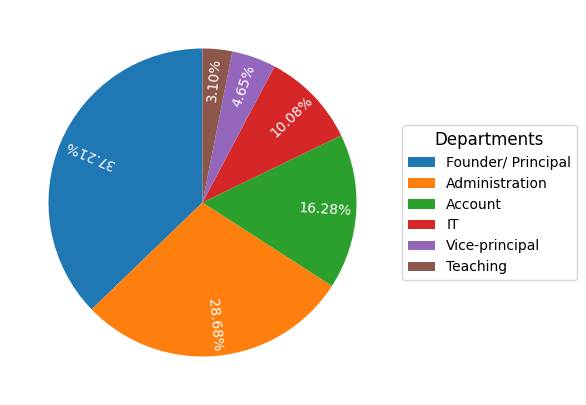

In [6]:
# Analize and visualize the catagorical data with pie charts

# Deparment

department = data.iloc[:, 0].value_counts().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize = (10,5))
wedges, texts, autotexts = ax.pie(
    department,
    labels=None,
    autopct='%1.2f%%',
    startangle=90,
    pctdistance = 0.8
)

# Add legend
ax.legend(
    wedges,
    department.index,
    title='Departments',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    title_fontsize=12
)

# Rotate percentage text
for autotext, wedge in zip(autotexts, wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    autotext.set_rotation(angle)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')
    autotext.set_color('white')
    autotext.set_fontsize(10)

# Adjust text properties
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

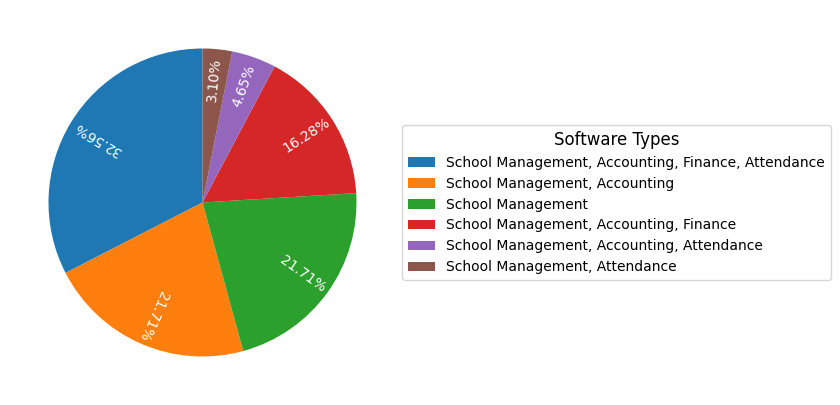

In [7]:
# Software Type

softwareType = data.iloc[:, 1].value_counts()
# Create pie chart
fig, ax = plt.subplots(figsize = (10,5))
wedges, texts, autotexts = ax.pie(
    softwareType,
    labels=None,
    autopct='%1.2f%%',
    startangle=90,
    pctdistance = 0.8
)

# Add legend
ax.legend(
    wedges,
    softwareType.index,
    title="Software Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    title_fontsize=12
)

# Rotate percentage text
for autotext, wedge in zip(autotexts, wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    autotext.set_rotation(angle)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')
    autotext.set_color('white')
    autotext.set_fontsize(10)

# Adjust text properties
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

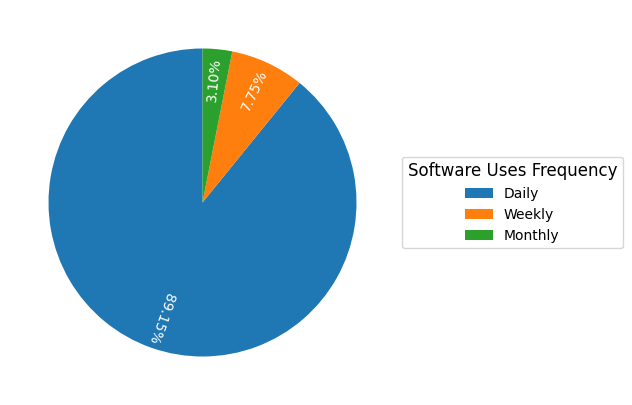

In [8]:
7# Software Type

frequency = data.iloc[:, 2].value_counts()
# Create pie chart
fig, ax = plt.subplots(figsize = (10,5))
wedges, texts, autotexts = ax.pie(
    frequency,
    labels=None,
    autopct='%1.2f%%',
    startangle=90,
    pctdistance = 0.8
)

# Add legend
ax.legend(
    wedges,
    frequency.index,
    title="Software Uses Frequency",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    title_fontsize=12
)

# Rotate percentage text
for autotext, wedge in zip(autotexts, wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    autotext.set_rotation(angle)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')
    autotext.set_color('white')
    autotext.set_fontsize(10)

# Adjust text properties
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

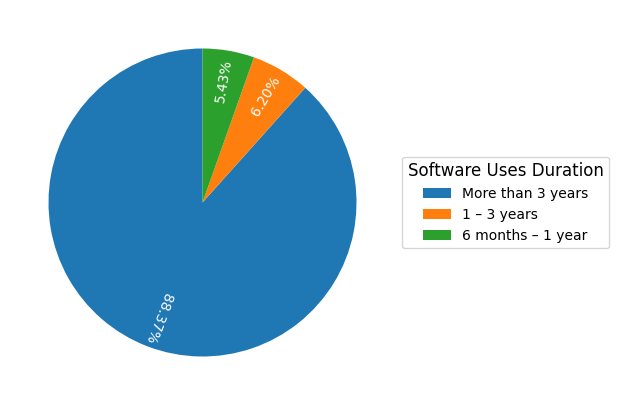

In [9]:
# Software Uses Duration

duration = data.iloc[:, 3].value_counts()
# Create pie chart
fig, ax = plt.subplots(figsize = (10,5))
wedges, texts, autotexts = ax.pie(
    duration,
    labels=None,
    autopct='%1.2f%%',
    startangle=90,
    pctdistance = 0.8
)

# Add legend
ax.legend(
    wedges,
    duration.index,
    title="Software Uses Duration",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    title_fontsize=12
)

# Rotate percentage text
for autotext, wedge in zip(autotexts, wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    autotext.set_rotation(angle)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')
    autotext.set_color('white')
    autotext.set_fontsize(10)

# Adjust text properties
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

In [10]:
# Numerical Data Analysis
# Calculate cunstructwise mean values

# Define groups (constructs) as dictionary of numerical columns
groups = {
    'rapport': ['Ra1','Ra2','Ra3','Ra4','Ra5'],
    'responsiveness': ['Res1','Res2','Res3','Res4','Res5'],
    'reliability': ['Rel1','Rel2','Rel3','Rel4','Rel5'],
    'flexibility': ['Fl1','Fl2','Fl3','Fl4','Fl5'],
    'features': ['Fe1','Fe2','Fe3','Fe4','Fe5'],
    'security': ['Sec1','Sec2','Sec3','Sec4','Sec5']
}

# Add new calculated column
for name, cols in groups.items():
    data[name] = data[cols].mean(axis=1)



In [12]:
# Assessment of Reflective Measurement Models: Loadings and Reliability

# Create dataframe to Measurement Models: Loadings and Reliability
df_reflective = data.select_dtypes(include = 'number').drop(columns = ['satisfaction'])


# Function to calculate Cronbach's Alpha
def cronbach_alpha(items_df):
    items = items_df.values
    item_variances = items.var(axis=0, ddof=1)
    total_variance = items.sum(axis=1).var(ddof=1)
    n_items = items.shape[1]
    if n_items == 1:
        return np.nan
    alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)
    return alpha

# Function to calculate Factor Loadings, CR, and AVE
def factor_metrics(items_df):
    if items_df.shape[1] == 1:
        return [np.nan], np.nan, np.nan
    fa = FactorAnalyzer(n_factors=1, rotation=None)
    fa.fit(items_df)
    loadings = fa.loadings_[:, 0]
    cr = (loadings.sum())**2 / ((loadings.sum())**2 + ((1 - loadings**2).sum()))
    ave = (loadings**2).sum() / len(loadings)
    return loadings, cr, ave

# Build reflective measurement table
table = []

# Cunstructs ues from groups dictonery
for construct, indicators in groups.items():
    items_df = df_reflective[indicators]
    alpha = cronbach_alpha(items_df)
    loadings, cr, ave = factor_metrics(items_df)

    loading_range = f"{round(loadings.min(), 2)} - {round(loadings.max(), 2)}"

    table.append({
        "Construct": construct,
        "Indicators": ", ".join(indicators),
        "Cronbach's Alpha": round(alpha, 3) if not np.isnan(alpha) else "Single item",
        "Range of Loadings": loading_range,
        "Composite Reliability": round(cr, 3) if not np.isnan(cr) else "Single item",
        "AVE": round(ave, 3) if not np.isnan(ave) else "Single item"
    })

rm_table = pd.DataFrame(table, columns=[
    "Construct", "Indicators", "Cronbach's Alpha", "Range of Loadings", "Composite Reliability", "AVE"
])

rm_table

,Construct,Indicators,Cronbach's Alpha,Range of Loadings,Composite Reliability,AVE
0,rapport,"Ra1, Ra2, Ra3, Ra4, Ra5",0.784,-0.87 - -0.22,0.825,0.513
1,responsiveness,"Res1, Res2, Res3, Res4, Res5",0.706,-0.73 - -0.34,0.722,0.356
2,reliability,"Rel1, Rel2, Rel3, Rel4, Rel5",0.818,-0.9 - -0.48,0.843,0.527
3,flexibility,"Fl1, Fl2, Fl3, Fl4, Fl5",0.849,-0.88 - -0.63,0.865,0.565
4,features,"Fe1, Fe2, Fe3, Fe4, Fe5",0.842,-0.89 - -0.6,0.859,0.554
5,security,"Sec1, Sec2, Sec3, Sec4, Sec5",0.815,-0.84 - -0.48,0.822,0.488


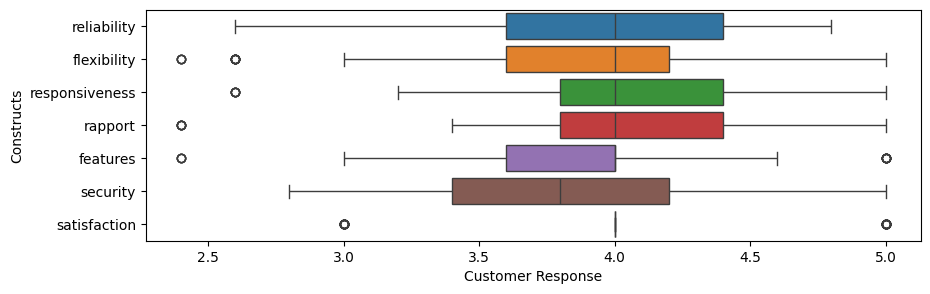

In [16]:
# Service Quality Assessment and presentation with boxplot

# Create dataframe of cunstructs
df_servqual = data[['reliability', 'flexibility', 'responsiveness', 'rapport', 'features', 'security', 'satisfaction']]

# Calculate mean value of each construct

# df_servqual['serviceQuality'] = df_servqual.mean(axis=1).round(2)

# Create Boxplot of cunstructs of service quality and service quality
plt.figure(figsize = (10, 3))
sns.boxplot(data = df_servqual, orient='h')
#plt.xticks(rotation=15)
plt.ylabel('Constructs')
plt.xlabel('Customer Response')
# plt.title('Boxplot of Construct Service Quality')
plt.show()

In [19]:
# Describtion of constructs and target
df_servqual.describe()

,reliability,flexibility,responsiveness,rapport,features,security,satisfaction
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,3.920930,3.851163,3.920930,4.060465,3.914729,3.804651,4.023256
std,0.628698,0.621128,0.495239,0.547497,0.556089,0.484423,0.643053
min,2.600000,2.400000,2.600000,2.400000,2.400000,2.800000,3.000000
25%,3.600000,3.600000,3.800000,3.800000,3.600000,3.400000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.800000,4.000000
75%,4.400000,4.200000,4.400000,4.400000,4.000000,4.200000,4.000000
max,4.800000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


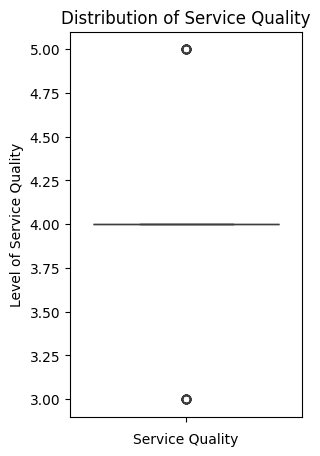

In [20]:
# Create Boxplot of satisfaction
plt.figure(figsize = (3, 5))
sns.boxplot(data = df_servqual['satisfaction'])
plt.xticks(rotation=25)
plt.xlabel('Service Quality')
plt.ylabel('Level of Service Quality')
plt.title('Distribution of Service Quality')
plt.show()

In [33]:
# Calculate correlation matrix

# Add satisfaction in servqual dataframe
df_servqual['satisfaction'] = data['satisfaction']

# Step 1: Compute correlation matrix
construct_corr = df_servqual.corr()

# Step 2: Compute p-values matrix
pvals = pd.DataFrame(np.zeros_like(construct_corr),
                     columns=construct_corr.columns,
                     index=construct_corr.index)

for r in construct_corr.columns:
    for c in construct_corr.columns:
        _, p = pearsonr(df_servqual[r], df_servqual[c])
        pvals.loc[r, c] = p

# Step 3: Format SPSS-style correlation table
def format_corr_matrix(corr, pvals):
    n = corr.shape[0]
    formatted = pd.DataFrame("", index=corr.index, columns=corr.columns)

    for i in range(n):
        for j in range(n):
            if i > j:  # lower triangle only
                value = corr.iloc[i, j]
                p = pvals.iloc[i, j]

                # Add significance stars
                if p < 0.001:
                    stars = "***"
                elif p < 0.01:
                    stars = "**"
                elif p < 0.05:
                    stars = "*"
                else:
                    stars = ""

                formatted.iloc[i, j] = f"{value:.3f}{stars}"
            elif i == j:
                formatted.iloc[i, j] = "1.000"  # diagonal
            else:
                formatted.iloc[i, j] = ""  # upper triangle blank

    return formatted

# Step 4: Generate formatted table
formatted_corr = format_corr_matrix(construct_corr, pvals)

# Display
formatted_corr


,reliability,flexibility,responsiveness,rapport,features,security,satisfaction
reliability,1.000,,,,,,
flexibility,0.630***,1.000,,,,,
responsiveness,0.542***,0.704***,1.000,,,,
rapport,0.601***,0.653***,0.532***,1.000,,,
features,0.586***,0.706***,0.692***,0.642***,1.000,,
security,0.528***,0.608***,0.602***,0.469***,0.681***,1.000,
satisfaction,0.117,0.122,0.055,-0.111,0.163,0.190*,1.000


In [34]:
# Second order wtight calculation


# Step 0: Prepare Data

df = data.copy()  # your original dataset


# Step 1: Aggregate indicators to first-order construct scores

df['Reliability'] = df[['Rel1','Rel2','Rel3','Rel4','Rel5']].mean(axis=1)
df['Responsiveness'] = df[['Res1','Res2','Res3','Res4','Res5']].mean(axis=1)
df['Flexibility'] = df[['Fl1','Fl2','Fl3','Fl4','Fl5']].mean(axis=1)
df['Rapport'] = df[['Ra1','Ra2','Ra3','Ra4','Ra5']].mean(axis=1)
df['Features'] = df[['Fe1','Fe2','Fe3','Fe4','Fe5']].mean(axis=1)
df['Security'] = df[['Sec1','Sec2','Sec3','Sec4','Sec5']].mean(axis=1)

first_order_cols = ['Reliability','Responsiveness','Flexibility','Rapport','Features','Security']


# Step 2: Compute overall SaaS-Qual using PCA (latent score)

pca = PCA(n_components=1)
df['SaaS_Qual_Latent'] = pca.fit_transform(df[first_order_cols])[:,0]


# Step 3: Regression to compute weights for weighted SaaS-Qual

X = df[first_order_cols]
y = df['SaaS_Qual_Latent']

reg = LinearRegression()
reg.fit(X, y)

weights = pd.Series(reg.coef_, index=first_order_cols)
print("Weights for each first-order construct:\n", weights)

# Compute weighted SaaS-Qual
df['SaaS_Qual_Weighted'] = df[first_order_cols].dot(weights)


# Step 4: Correlation analysis

correlation_df = df[first_order_cols + ['SaaS_Qual_Weighted']].corr()
corr_with_saas = correlation_df['SaaS_Qual_Weighted'].drop('SaaS_Qual_Weighted')
print("\nCorrelation of first-order constructs with weighted SaaS-Qual:\n", corr_with_saas)


# Step 5: Reliability check (Cronbach's alpha)

def cronbach_alpha(items_df):
    items = items_df.values
    item_variances = items.var(axis=0, ddof=1)
    total_variance = items.sum(axis=1).var(ddof=1)
    n_items = items.shape[1]
    if n_items == 1:
        return np.nan
    alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)
    return alpha

alpha = cronbach_alpha(df[first_order_cols])
print(f"\nCronbach's Alpha for SaaS-Qual first-order constructs: {alpha:.3f}")


# df now contains:
# - First-order construct scores
# - SaaS_Qual_Latent (PCA latent score)
# - SaaS_Qual_Weighted (regression-weighted overall score)



Weights for each first-order construct:
 Reliability       0.450728
Responsiveness    0.353168
Flexibility       0.487848
Rapport           0.384143
Features          0.425975
Security          0.324191
dtype: float64

Correlation of first-order constructs with weighted SaaS-Qual:
 Reliability       0.810844
Responsiveness    0.806550
Flexibility       0.888318
Rapport           0.793553
Features          0.866372
Security          0.756904
Name: SaaS_Qual_Weighted, dtype: float64

Cronbach's Alpha for SaaS-Qual first-order constructs: 0.902


In [39]:
# Calculation of correlation with SaaS Qual Weighted values
df['Satisfaction'] = data['satisfaction']
df_corr = df[['Reliability','Responsiveness','Flexibility','Rapport','Features','Security' ,'SaaS_Qual_Weighted', 'Satisfaction']]
df_corr.corr()

,Reliability,Responsiveness,Flexibility,Rapport,Features,Security,SaaS_Qual_Weighted,Satisfaction
Reliability,1.000000,0.541821,0.629836,0.601393,0.585699,0.527598,0.810905,0.116664
Responsiveness,0.541821,1.000000,0.704072,0.531800,0.692474,0.602043,0.806514,0.054883
Flexibility,0.629836,0.704072,1.000000,0.653388,0.705763,0.607817,0.888331,0.122180
Rapport,0.601393,0.531800,0.653388,1.000000,0.642156,0.469060,0.793535,-0.110538
Features,0.585699,0.692474,0.705763,0.642156,1.000000,0.681280,0.866354,0.162890
Security,0.527598,0.602043,0.607817,0.469060,0.681280,1.000000,0.756860,0.190254
SaaS_Qual_Weighted,0.810905,0.806514,0.888331,0.793535,0.866354,0.756860,1.000000,0.110444
Satisfaction,0.116664,0.054883,0.122180,-0.110538,0.162890,0.190254,0.110444,1.000000


In [35]:

# Calculation of Reflective Measurement Model Table and Second-order Weights Table


# Step 0: Prepare Data

df = data.copy()

# Define first-order constructs and their indicators
constructs = {
    'Reliability': ['Rel1','Rel2','Rel3','Rel4','Rel5'],
    'Responsiveness': ['Res1','Res2','Res3','Res4','Res5'],
    'Flexibility': ['Fl1','Fl2','Fl3','Fl4','Fl5'],
    'Rapport': ['Ra1','Ra2','Ra3','Ra4','Ra5'],
    'Features': ['Fe1','Fe2','Fe3','Fe4','Fe5'],
    'Security': ['Sec1','Sec2','Sec3','Sec4','Sec5']
}


# Step 1: Aggregate indicators to first-order construct scores


for construct, indicators in constructs.items():
    df[construct] = df[indicators].mean(axis=1)

first_order_cols = list(constructs.keys())



# Step 2: Compute PCA latent score for overall SaaS-Qual


pca = PCA(n_components=1)
df['SaaS_Qual_Latent'] = pca.fit_transform(df[first_order_cols])[:,0]



# Step 3: Regression-based weights


X = df[first_order_cols]
y = df['SaaS_Qual_Latent']
reg = LinearRegression().fit(X, y)
weights = pd.Series(reg.coef_, index=first_order_cols).round(3)

# Compute weighted SaaS-Qual
df['SaaS_Qual_Weighted'] = df[first_order_cols].dot(weights)



# Step 4: Cronbach's alpha function


def cronbach_alpha(items_df):
    items = items_df.values
    item_variances = items.var(axis=0, ddof=1)
    total_variance = items.sum(axis=1).var(ddof=1)
    n_items = items.shape[1]
    if n_items == 1:
        return np.nan
    alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)
    return alpha



# Step 5: Build Reflective Measurement Table


rm_table = []
for construct, indicators in constructs.items():
    # Cronbach's alpha
    alpha = cronbach_alpha(df[indicators])

    # Approximate factor loadings: correlation of each indicator with construct mean
    loadings = [df[ind].corr(df[construct]) for ind in indicators]
    loading_range = f"{min(loadings):.2f} - {max(loadings):.2f}"

    # Composite Reliability (CR) and AVE
    cr = (np.sum(loadings)**2) / ((np.sum(loadings)**2) + np.sum(1 - np.array(loadings)**2))
    ave = np.sum(np.array(loadings)**2) / len(loadings)

    rm_table.append({
        'Construct': construct,
        'Indicators': ", ".join(indicators),
        "Cronbach's Alpha": round(alpha,3),
        "Range of Loadings": loading_range,
        'CR': round(cr,3),
        'AVE': round(ave,3)
    })

rm_df = pd.DataFrame(rm_table)
print("\nReflective Measurement Model Table:\n")
print(rm_df)



# Step 6: Build Second-order Weights Table


second_order_table = pd.DataFrame({
    'First-order Construct': first_order_cols,
    'Regression Weight': weights.values,
    'Correlation with SaaS-Qual': [df[construct].corr(df['SaaS_Qual_Weighted']) for construct in first_order_cols]
})

print("\nSecond-order Weights Table:\n")
print(second_order_table)



Reflective Measurement Model Table:

        Construct                    Indicators  Cronbach's Alpha  \
0     Reliability  Rel1, Rel2, Rel3, Rel4, Rel5             0.818   
1  Responsiveness  Res1, Res2, Res3, Res4, Res5             0.706   
2     Flexibility       Fl1, Fl2, Fl3, Fl4, Fl5             0.849   
3         Rapport       Ra1, Ra2, Ra3, Ra4, Ra5             0.784   
4        Features       Fe1, Fe2, Fe3, Fe4, Fe5             0.842   
5        Security  Sec1, Sec2, Sec3, Sec4, Sec5             0.815   

  Range of Loadings     CR    AVE  
0       0.64 - 0.88  0.883  0.603  
1       0.55 - 0.79  0.814  0.470  
2       0.76 - 0.84  0.900  0.643  
3       0.48 - 0.86  0.866  0.573  
4       0.74 - 0.86  0.894  0.630  
5       0.65 - 0.83  0.873  0.580  

Second-order Weights Table:

  First-order Construct  Regression Weight  Correlation with SaaS-Qual
0           Reliability              0.451                    0.810905
1        Responsiveness              0.353            

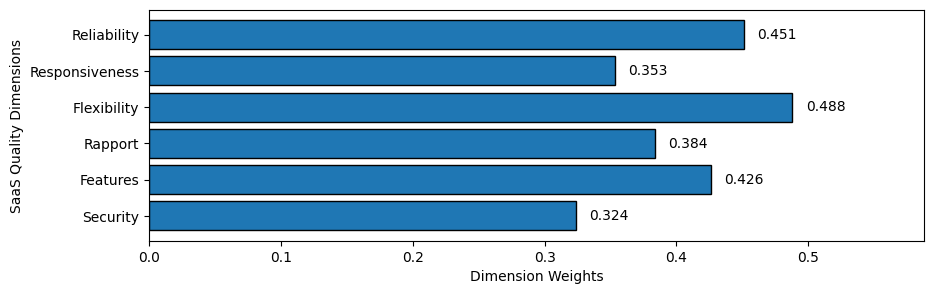

In [36]:
# create Second-order Weights Bar Chart

labels = [
    "Reliability",
    "Responsiveness",
    "Flexibility",
    "Rapport",
    "Features",
    "Security"
]

values = [
    0.451,   # Reliability
    0.353,   # Responsiveness
    0.488,   # Flexibility
    0.384,   # Rapport
    0.426,   # Features
    0.324    # Security
]

# ------------------------------------------------
# HORIZONTAL BAR CHART
# ------------------------------------------------
plt.figure(figsize=(10, 3))
bars = plt.barh(labels, values, edgecolor='black')

# Add value labels at the end of each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.01, bar.get_y() + bar.get_height()/2,
             round(xval, 3), va='center')

# Title + labels
#plt.title("Weighted Contribution of SaaS Quality Dimensions")
plt.xlabel("Dimension Weights")
plt.ylabel("SaaS Quality Dimensions")

# X-axis limit
plt.xlim(0, max(values) + 0.1)

plt.gca().invert_yaxis()  # Highest value on top (optional)

plt.show()


Regression using all first-order constructs:
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     3.646
Date:                Sun, 30 Nov 2025   Prob (F-statistic):            0.00230
Time:                        19:46:10   Log-Likelihood:                -114.95
No. Observations:                 129   AIC:                             243.9
Df Residuals:                     122   BIC:                             263.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

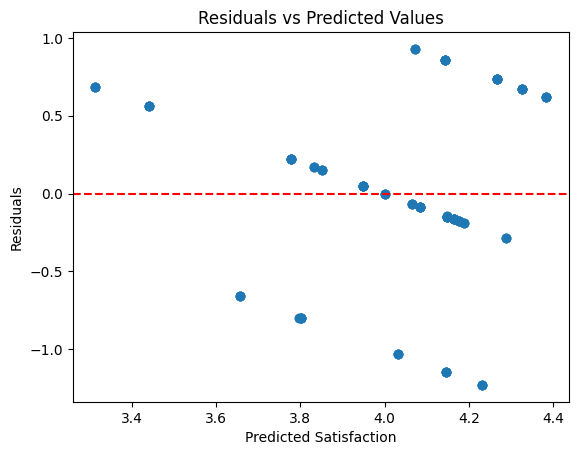

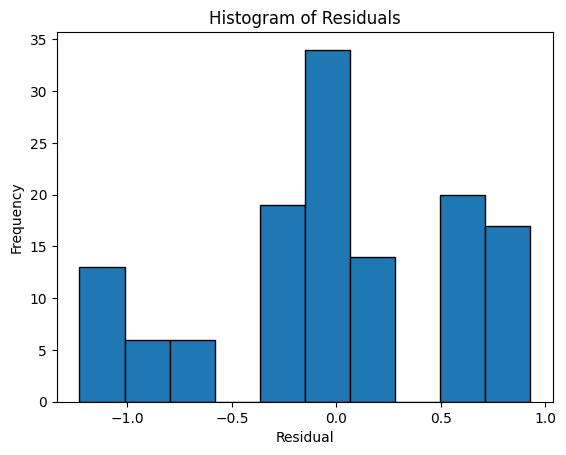

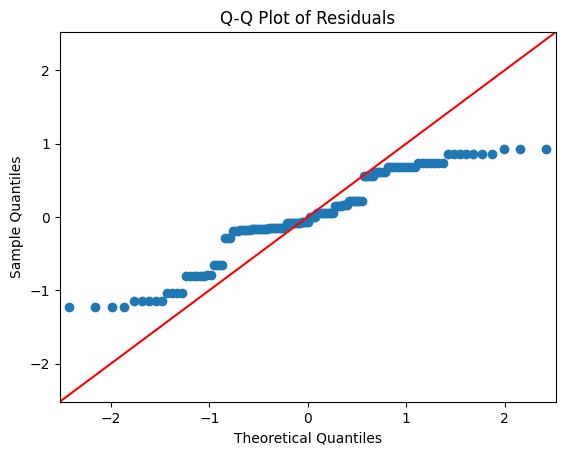


R² using all first-order constructs: 0.152
R² using overall weighted score: 0.012


In [37]:
# Regression Analysis Workflow


# 1. Regression using all first-order constructs


X = df[['Reliability', 'Responsiveness', 'Flexibility', 'Rapport', 'Features', 'Security']]
y = df['satisfaction']

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()

# Print summary (includes coefficients, R², adjusted R², p-values)
print("Regression using all first-order constructs:")
print(model.summary())



# 2. Check multicollinearity (VIF)

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)



# 3. Regression using overall weighted score

X_weighted = df[['SaaS_Qual_Weighted']]
X_weighted_const = sm.add_constant(X_weighted)

model_weighted = sm.OLS(y, X_weighted_const).fit()
print("\nRegression using overall weighted score:")
print(model_weighted.summary())


# 4. Residual analysis (assumptions check)

# Predicted values
y_pred = model.predict(X_const)
residuals = y - y_pred

# Residuals vs Predicted plot (linearity & homoscedasticity)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Satisfaction')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Histogram of residuals (normality)
plt.hist(residuals, bins=10, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()



# 5. Optional: Compare R² of both models

r2_full = model.rsquared
r2_weighted = model_weighted.rsquared

print(f"\nR² using all first-order constructs: {r2_full:.3f}")
print(f"R² using overall weighted score: {r2_weighted:.3f}")



# 🔍 Interpretation Notes

Below are interpretation placeholders you can adapt for each analysis step:

### **1. Reliability (Cronbach’s Alpha)**
_All constructs with α > 0.70 indicate acceptable internal consistency, supporting the reliability of measurement scales._

### **2. Correlation Analysis**
_Correlation coefficients indicate the strength and direction of relationships between service quality dimensions and customer satisfaction. Weak correlations suggest limited predictive power._

### **3. Regression Analysis**
_Regression coefficients and p-values indicate which service quality dimensions significantly predict satisfaction. R² reflects overall model explanatory power._

### **4. Multicollinearity (VIF)**
_VIF < 5 confirms no serious multicollinearity issues among predictors._

### **5. Residual Diagnostics**
_Normality, homoscedasticity, and linearity checks confirm the validity of regression assumptions._
